# **PEMBANGUNAN MODEL KLASIFIKASI JENIS PAKAIAN**

# **A. LOAD & EKSPLORASI DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


EKSTRAK DATASET

In [ ]:
import zipfile
import os

# Path zip dan folder ekstrak
zip_path = "/content/drive/MyDrive/UAP/archive.zip"
extract_path = "/content/drive/MyDrive/UAP"

# Ekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ekstraksi selesai.")
print("Isi folder UAP:")
print(os.listdir(extract_path))


Ekstraksi selesai.
Isi folder UAP:
['archive.zip', 'zalando']


**CEK STRUKTUR DATASET**

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/UAP"

print("Struktur Folder Dataset:\n")

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 2 * level

    # Hitung jumlah gambar di folder ini
    image_count = len([
        f for f in files
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])

    folder_name = os.path.basename(root)
    print(f"{indent}{folder_name}/ ({image_count} gambar)")


Struktur Folder Dataset:

UAP/ (0 gambar)
  Dataset/ (0 gambar)
    hoodies-female/ (1209 gambar)
    hoodies/ (2143 gambar)
    longsleeve/ (1699 gambar)
    shirt/ (4789 gambar)
    sweatshirt-female/ (2455 gambar)
    sweatshirt/ (3885 gambar)
  dataset_final/ (0 gambar)
    hoodies/ (1500 gambar)
    longsleeve/ (1500 gambar)
    shirt/ (1500 gambar)
    sweatshirt/ (1500 gambar)
  dataset_split/ (0 gambar)
    train/ (0 gambar)
      hoodies/ (1050 gambar)
      longsleeve/ (1050 gambar)
      shirt/ (1050 gambar)
      sweatshirt/ (1050 gambar)
    val/ (0 gambar)
      hoodies/ (225 gambar)
      longsleeve/ (225 gambar)
      shirt/ (225 gambar)
      sweatshirt/ (225 gambar)
    test/ (0 gambar)
      hoodies/ (225 gambar)
      longsleeve/ (225 gambar)
      shirt/ (225 gambar)
      sweatshirt/ (225 gambar)
  saved_models1/ (0 gambar)
    cnn_non_pretrained/ (0 gambar)
    mobilenetv2_pretrained/ (0 gambar)
    model_efficientnetb0/ (0 gambar)
  saved_models/ (0 gambar)
    

**Sampling Dataset**

In [ ]:
import os
import shutil
import random

# ===============================
# KONFIGURASI
# ===============================
source_path = "/content/drive/MyDrive/UAP/Dataset"
target_path = "/content/drive/MyDrive/UAP/dataset_final"

classes = {
    "hoodies": 1500,
    "longsleeve": 1500,
    "shirt": 1500,
    "sweatshirt": 1500
}

random.seed(42)

# ===============================
# PROSES
# ===============================
os.makedirs(target_path, exist_ok=True)

for class_name, sample_size in classes.items():
    src_class_dir = os.path.join(source_path, class_name)
    dst_class_dir = os.path.join(target_path, class_name)

    os.makedirs(dst_class_dir, exist_ok=True)

    # Ambil semua file gambar
    images = [
        f for f in os.listdir(src_class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Random sampling
    selected_images = random.sample(images, sample_size)

    # Copy file
    for img in selected_images:
        shutil.copy(
            os.path.join(src_class_dir, img),
            os.path.join(dst_class_dir, img)
        )

    print(f"{class_name}: {len(selected_images)} gambar disalin")

print("\n✅ Dataset final siap digunakan.")

for folder in sorted(os.listdir(target_path)):
    folder_path = os.path.join(target_path, folder)
    if os.path.isdir(folder_path):
        print(f"{folder}: {len(os.listdir(folder_path))} gambar")



hoodies: 1500 gambar disalin
longsleeve: 1500 gambar disalin
shirt: 1500 gambar disalin
sweatshirt: 1500 gambar disalin

✅ Dataset final siap digunakan.
hoodies: 1500 gambar
longsleeve: 1500 gambar
shirt: 1500 gambar
sweatshirt: 1500 gambar


**SPLIT DATASET**

In [ ]:
import os
import shutil
import random

# ===============================
# KONFIGURASI PATH
# ===============================
source_dir = "/content/drive/MyDrive/UAP/dataset_final"
target_dir = "/content/drive/MyDrive/UAP/dataset_split"

splits = {
    "train": 0.7,
    "val": 0.15,
    "test": 0.15
}

random.seed(42)

# ===============================
# PROSES SPLIT
# ===============================
for split in splits:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, split, class_name), exist_ok=True)

for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    images = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    random.shuffle(images)
    total = len(images)

    train_end = int(splits["train"] * total)
    val_end = train_end + int(splits["val"] * total)

    split_files = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split, files in split_files.items():
        for file in files:
            src = os.path.join(class_path, file)
            dst = os.path.join(target_dir, split, class_name, file)
            shutil.copy(src, dst)

    print(f"{class_name}: "
          f"train={len(split_files['train'])}, "
          f"val={len(split_files['val'])}, "
          f"test={len(split_files['test'])}")


hoodies: train=1050, val=225, test=225
longsleeve: train=1050, val=225, test=225
shirt: train=1050, val=225, test=225
sweatshirt: train=1050, val=225, test=225


In [ ]:
for split in ["train", "val", "test"]:
    print(f"\n{split.upper()}")
    for cls in os.listdir(os.path.join(target_dir, split)):
        cls_path = os.path.join(target_dir, split, cls)
        print(f"  {cls}: {len(os.listdir(cls_path))} gambar")



TRAIN
  hoodies: 1050 gambar
  longsleeve: 1050 gambar
  shirt: 1050 gambar
  sweatshirt: 1050 gambar

VAL
  hoodies: 225 gambar
  longsleeve: 225 gambar
  shirt: 225 gambar
  sweatshirt: 225 gambar

TEST
  hoodies: 225 gambar
  longsleeve: 225 gambar
  shirt: 225 gambar
  sweatshirt: 225 gambar


# **B. PREPROCESSING**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# KONFIGURASI
# ===============================
base_dir = "/content/drive/MyDrive/UAP/dataset_split"
img_size = (224, 224)
batch_size = 32

# ===============================
# DATA GENERATOR
# ===============================

# Train (dengan augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validation & Test (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

# ===============================
# LOAD DATA
# ===============================
train_generator = train_datagen.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    directory=f"{base_dir}/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    directory=f"{base_dir}/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 4200 images belonging to 4 classes.
Found 900 images belonging to 4 classes.
Found 900 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)


{'hoodies': 0, 'longsleeve': 1, 'shirt': 2, 'sweatshirt': 3}


In [ ]:
import json

class_mapping = train_generator.class_indices

mapping_path = "/content/drive/MyDrive/UAP/class_mapping.json"

with open(mapping_path, "w") as f:
    json.dump(class_mapping, f)

print("Class mapping berhasil disimpan:")
print(class_mapping)


Class mapping berhasil disimpan:
{'hoodies': 0, 'longsleeve': 1, 'shirt': 2, 'sweatshirt': 3}


# **C. PEMBANGUNAN MODEL CNN NON-PRETRAINED**

1. Build Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout
)

num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

2. Compile Model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


3. Training Model

In [ ]:
epochs = 15

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 107s 748ms/step - accuracy: 0.2789 - loss: 1.3947 - val_accuracy: 0.5033 - val_loss: 1.1742
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 695ms/step - accuracy: 0.4033 - loss: 1.2497 - val_accuracy: 0.5433 - val_loss: 1.0048
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 145s 719ms/step - accuracy: 0.4749 - loss: 1.1243 - val_accuracy: 0.5633 - val_loss: 0.9252
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 700ms/step - accuracy: 0.4932 - loss: 1.0676 - val_accuracy: 0.5944 - val_loss: 0.8954
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 706ms/step - accuracy: 0.5243 - loss: 1.0241 - val_accuracy: 0.6022 - val_loss: 0.8649
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 705ms/step - accuracy: 0.5060 - loss: 1.0251 - val_accuracy: 0.6033 - val_loss: 0.8553
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 699ms/step - accuracy: 0.5318 - loss: 0.9804 - val_accuracy: 0.6256 - val_loss: 0.8306
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 91s 690ms/step - accuracy: 0.5503 - loss:

4. Evaluasi Awal (Test Set)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.6868 - loss: 0.8952
Test Accuracy: 0.6344


5. Visualisasi

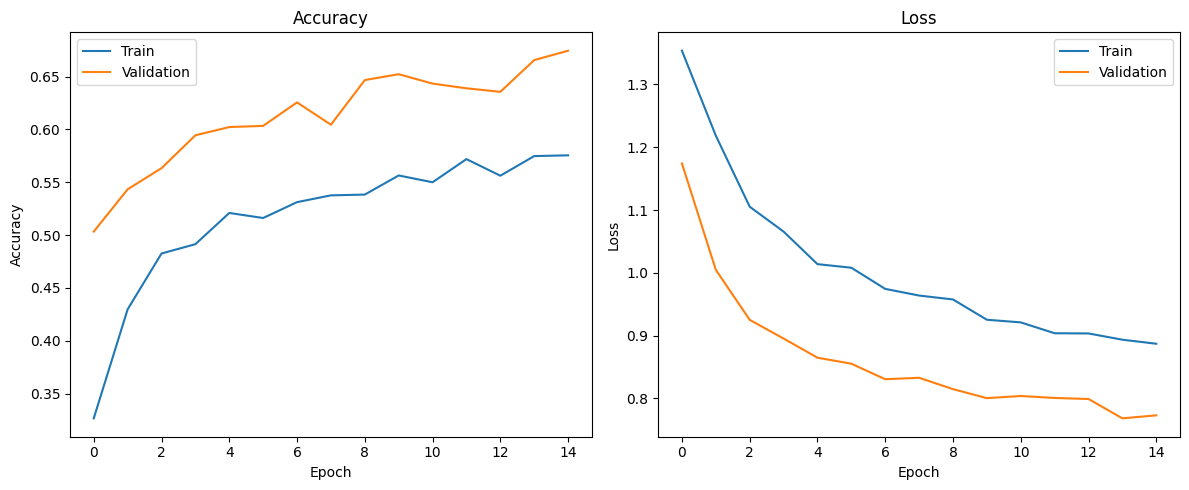

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Prediksi kelas
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Label sebenarnya
y_true = test_generator.classes

# Nama kelas
class_labels = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(
    y_true,
    y_pred,
    target_names=class_labels
))


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step
              precision    recall  f1-score   support

     hoodies       0.52      0.62      0.56       225
  longsleeve       0.56      0.80      0.66       225
       shirt       0.92      0.96      0.94       225
  sweatshirt       0.49      0.16      0.24       225

    accuracy                           0.63       900
   macro avg       0.62      0.63      0.60       900
weighted avg       0.62      0.63      0.60       900



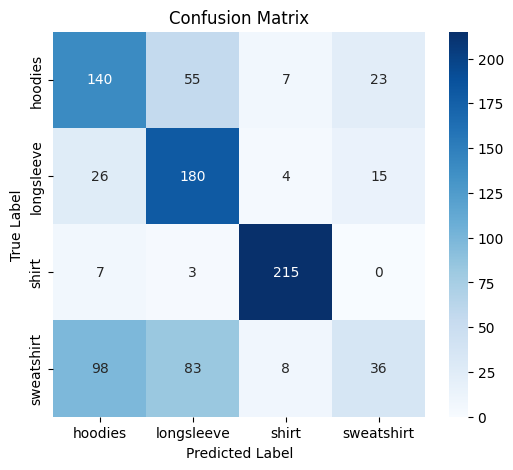

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


6. MENYIIMPAN MODEL NON-PRETRAINED

In [ ]:
import os
import json
import pandas as pd

# =========================================================
# KONFIGURASI PATH
# =========================================================
BASE_SAVE_DIR = "/content/drive/MyDrive/UAP/saved_models"
MODEL_NAME = "cnn_non_pretrained"

model_dir = os.path.join(BASE_SAVE_DIR, MODEL_NAME)
os.makedirs(model_dir, exist_ok=True)

# =========================================================
# 1️⃣ SIMPAN MODEL
# =========================================================
model_path = os.path.join(model_dir, "model.h5")
model.save(model_path)

print(f"[OK] Model disimpan di: {model_path}")

# =========================================================
# 2️⃣ SIMPAN CLASS MAPPING
# =========================================================
class_mapping = train_generator.class_indices
mapping_path = os.path.join(model_dir, "class_mapping.json")

with open(mapping_path, "w") as f:
    json.dump(class_mapping, f)

print("[OK] Class mapping disimpan:")
print(class_mapping)

# =========================================================
# 3️⃣ SIMPAN KONFIGURASI PREPROCESSING
# =========================================================
config = {
    "img_height": 224,
    "img_width": 224,
    "rescale": 1/255,
    "num_classes": train_generator.num_classes,
    "model_type": "cnn_non_pretrained"
}

config_path = os.path.join(model_dir, "config.json")

with open(config_path, "w") as f:
    json.dump(config, f)

print("[OK] Config preprocessing disimpan.")

# =========================================================
# 4️⃣ SIMPAN HISTORY TRAINING (OPSIONAL TAPI DISARANKAN)
# =========================================================
history_df = pd.DataFrame(history.history)
history_path = os.path.join(model_dir, "training_history.csv")
history_df.to_csv(history_path, index=False)

print("[OK] History training disimpan.")

# =========================================================
# 5️⃣ VERIFIKASI FILE
# =========================================================
print("\nIsi folder model:")
print(os.listdir(model_dir))


[OK] Model disimpan di: /content/drive/MyDrive/UAP/saved_models/cnn_non_pretrained/model.h5
[OK] Class mapping disimpan:
{'hoodies': 0, 'longsleeve': 1, 'shirt': 2, 'sweatshirt': 3}
[OK] Config preprocessing disimpan.
[OK] History training disimpan.

Isi folder model:
['model.h5', 'class_mapping.json', 'config.json', 'training_history.csv']


# **D. PEMBANGUNAN MODEL PRETRAINED 1 (MobileNetV2)**

In [ ]:
!cp -r /content/drive/MyDrive/UAP/dataset_split /content/dataset_split


1. IMPORT & KONFIGURASI

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout


2. DATA GENERATOR (PREPROCESSING)

In [ ]:
base_dir = "/content/drive/MyDrive/UAP/dataset_split"
img_size = (224, 224)
batch_size = 32

# Train (augmentasi + preprocess_input)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validation & Test (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    f"{base_dir}/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    f"{base_dir}/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    f"{base_dir}/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 4200 images belonging to 4 classes.
Found 900 images belonging to 4 classes.
Found 900 images belonging to 4 classes.


3. LOAD BASE MODEL (MOBILENETV2)

In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze semua layer terlebih dahulu
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


4. HEAD CLASSIFIER

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation="softmax")(x)

model_pretrained_1 = Model(inputs=base_model.input, outputs=output)

model_pretrained_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 2,025,924 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

5. TRAINING TAHAP 1 (FEATURE EXTRACTION)

In [ ]:
model_pretrained_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

epochs_stage_1 = 10

history_stage_1 = model_pretrained_1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs_stage_1
)


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.5397 - loss: 1.0262

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 124s 867ms/step - accuracy: 0.5397 - loss: 1.0260 - val_accuracy: 0.6467 - val_loss: 0.8156
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 716ms/step - accuracy: 0.6033 - loss: 0.8827 - val_accuracy: 0.6656 - val_loss: 0.7566
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 706ms/step - accuracy: 0.6104 - loss: 0.8399 - val_accuracy: 0.6756 - val_loss: 0.7224
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 714ms/step - accuracy: 0.6160 - loss: 0.8056 - val_accuracy: 0.6900 - val_loss: 0.6981
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 699ms/step - accuracy: 0.6406 - loss: 0.7675 - val_accuracy: 0.6844 - val_loss: 0.6908
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 735ms/step - accuracy: 0.6553 - loss: 0.7494 - val_accuracy: 0.7100 - val_loss: 0.6682
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 700ms/step - accuracy: 0.6619 - loss: 0.7242 - val_accuracy: 0.7111 - val_loss: 0.6607
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 95s 717ms/step - accuracy: 0.6670 - loss: 0.7178 - va

In [ ]:
6. FINE-TUNING (UNFREEZE SEBAGIAN LAYER)

In [ ]:
# Unfreeze layer mulai dari block_13 ke atas
fine_tune_at = 100  # aman & umum untuk MobileNetV2

for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True


7. COMPILE ULANG (LR LEBIH KECIL)

In [ ]:
model_pretrained_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


8. TRAINING TAHAP 2 (FINE-TUNING)

In [ ]:
epochs_stage_2 = 10

history_stage_2 = model_pretrained_1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs_stage_2
)


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 135s 852ms/step - accuracy: 0.5573 - loss: 0.9562 - val_accuracy: 0.6989 - val_loss: 0.6273
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 709ms/step - accuracy: 0.6412 - loss: 0.7929 - val_accuracy: 0.6978 - val_loss: 0.6328
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 709ms/step - accuracy: 0.6674 - loss: 0.7226 - val_accuracy: 0.7133 - val_loss: 0.5987
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 710ms/step - accuracy: 0.6690 - loss: 0.7063 - val_accuracy: 0.7178 - val_loss: 0.5845
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 708ms/step - accuracy: 0.6849 - loss: 0.6703 - val_accuracy: 0.7233 - val_loss: 0.5819
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 105s 796ms/step - accuracy: 0.7183 - loss: 0.6208 - val_accuracy: 0.7467 - val_loss: 0.5625
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 99s 751ms/step - accuracy: 0.7274 - loss: 0.6056 - val_accuracy: 0.7489 - val_loss: 0.5555
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 96s 727ms/step - accuracy: 0.7412 - loss:

9. EVALUASI TEST SET

In [ ]:
test_loss, test_acc = model_pretrained_1.evaluate(test_generator)
print(f"Test Accuracy (MobileNetV2 + Fine-Tuning): {test_acc:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.7666 - loss: 0.5607
Test Accuracy (MobileNetV2 + Fine-Tuning): 0.7544


10. VISUALISASI

In [ ]:
import pandas as pd

# History stage 1
df_stage_1 = pd.DataFrame(history_stage_1.history)
df_stage_1["epoch"] = range(1, len(df_stage_1) + 1)
df_stage_1["stage"] = "Freeze Base Model"

# History stage 2
df_stage_2 = pd.DataFrame(history_stage_2.history)
df_stage_2["epoch"] = range(
    df_stage_1["epoch"].max() + 1,
    df_stage_1["epoch"].max() + len(df_stage_2) + 1
)
df_stage_2["stage"] = "Fine-Tuning"

# Gabungkan
history_all = pd.concat([df_stage_1, df_stage_2], ignore_index=True)

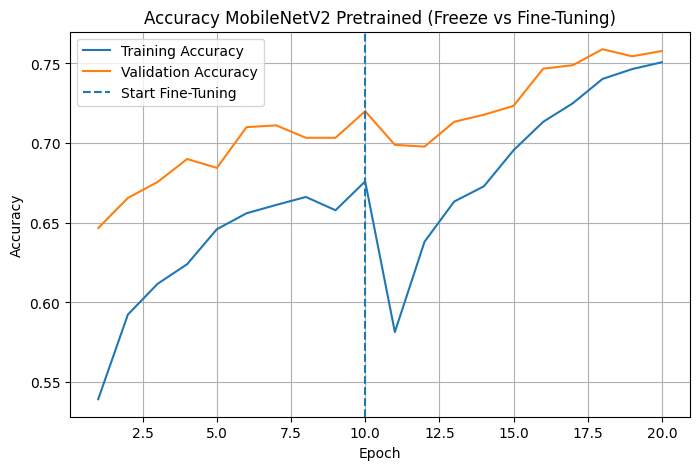

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(history_all["epoch"], history_all["accuracy"], label="Training Accuracy")
plt.plot(history_all["epoch"], history_all["val_accuracy"], label="Validation Accuracy")

# Garis pemisah stage
plt.axvline(
    x=df_stage_1["epoch"].max(),
    linestyle="--",
    label="Start Fine-Tuning"
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy MobileNetV2 Pretrained (Freeze vs Fine-Tuning)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Prediksi
y_pred_prob = model_pretrained_1.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Label asli
y_true = test_generator.classes

# Mapping label
class_indices = test_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

target_names = [idx_to_class[i] for i in range(len(idx_to_class))]

# Classification report
report = classification_report(
    y_true,
    y_pred,
    target_names=target_names
)

print("Classification Report:\n")
print(report)


29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 518ms/step
Classification Report:

              precision    recall  f1-score   support

     hoodies       0.64      0.72      0.68       225
  longsleeve       0.81      0.84      0.82       225
       shirt       0.97      0.98      0.97       225
  sweatshirt       0.58      0.47      0.52       225

    accuracy                           0.75       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.75      0.75      0.75       900



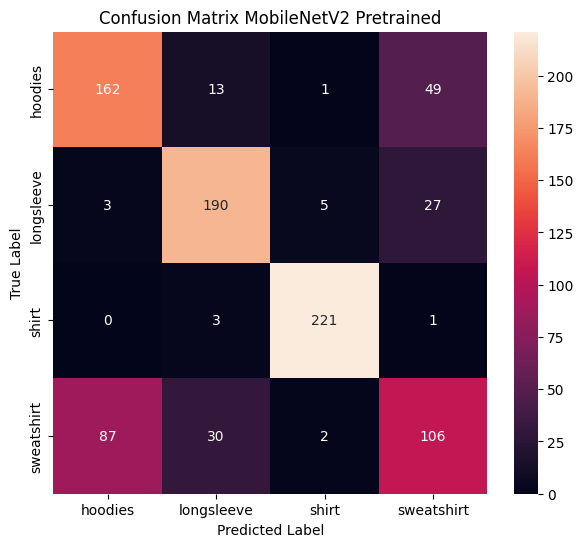

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=target_names,
    yticklabels=target_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix MobileNetV2 Pretrained")
plt.show()


6. MENYIMPAN MODEL PRETRAINED 1 (MobileNetV2)

In [ ]:
import os
import json
import pandas as pd

# =========================================================
# KONFIGURASI PATH
# =========================================================
BASE_SAVE_DIR = "/content/drive/MyDrive/UAP/saved_models"
MODEL_NAME = "mobilenetv2_pretrained"

model_dir = os.path.join(BASE_SAVE_DIR, MODEL_NAME)
os.makedirs(model_dir, exist_ok=True)

# =========================================================
# 1️⃣ SIMPAN MODEL PRETRAINED
# =========================================================
model_path = os.path.join(model_dir, "model.h5")
model_pretrained_1.save(model_path)

print(f"[OK] Model MobileNetV2 disimpan di: {model_path}")

# =========================================================
# 2️⃣ SIMPAN CLASS MAPPING
# =========================================================
class_mapping = train_generator.class_indices
mapping_path = os.path.join(model_dir, "class_mapping.json")

with open(mapping_path, "w") as f:
    json.dump(class_mapping, f, indent=4)

print("[OK] Class mapping disimpan:")
print(class_mapping)

# =========================================================
# 3️⃣ SIMPAN KONFIGURASI PREPROCESSING
# (WAJIB untuk konsistensi dashboard)
# =========================================================
config = {
    "img_height": 224,
    "img_width": 224,
    "preprocessing_function": "mobilenet_v2.preprocess_input",
    "num_classes": train_generator.num_classes,
    "model_type": "mobilenetv2_pretrained",
    "base_model": "MobileNetV2",
    "weights": "imagenet",
    "fine_tuning": True,
    "fine_tune_at": 100,
    "optimizer_stage_1": "Adam(lr=1e-4)",
    "optimizer_stage_2": "Adam(lr=1e-5)"
}

config_path = os.path.join(model_dir, "config.json")

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

print("[OK] Config preprocessing disimpan.")

# =========================================================
# 4️⃣ SIMPAN HISTORY TRAINING (GABUNG STAGE 1 & STAGE 2)
# =========================================================
history_stage_1_df = pd.DataFrame(history_stage_1.history)
history_stage_1_df["stage"] = "freeze_base"

history_stage_2_df = pd.DataFrame(history_stage_2.history)
history_stage_2_df["stage"] = "fine_tuning"

history_df = pd.concat(
    [history_stage_1_df, history_stage_2_df],
    ignore_index=True
)

history_path = os.path.join(model_dir, "training_history.csv")
history_df.to_csv(history_path, index=False)

print("[OK] History training (stage 1 + stage 2) disimpan.")

# =========================================================
# 5️⃣ VERIFIKASI FILE
# =========================================================
print("\nIsi folder model pretrained:")
for file in os.listdir(model_dir):
    print("-", file)


[OK] Model MobileNetV2 disimpan di: /content/drive/MyDrive/UAP/saved_models/mobilenetv2_pretrained/model.h5
[OK] Class mapping disimpan:
{'hoodies': 0, 'longsleeve': 1, 'shirt': 2, 'sweatshirt': 3}
[OK] Config preprocessing disimpan.
[OK] History training (stage 1 + stage 2) disimpan.

Isi folder model pretrained:
- model.h5
- class_mapping.json
- config.json
- training_history.csv


# **E. PEMBANGUNAN MODEL PRETRAINED 2 (EFFICIENTNETB0)**

1️. IMPORT & KONFIGURASI

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


In [ ]:
# PATH DATASET
base_dir = "/content/drive/MyDrive/UAP/dataset_split"

train_dir = f"{base_dir}/train"
val_dir   = f"{base_dir}/val"
test_dir  = f"{base_dir}/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


2. DATA GENERATOR (PREPROCESS EFFICIENTNET)

In [ ]:
# TRAIN (augmentasi)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# VAL & TEST (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 4200 images belonging to 4 classes.
Found 900 images belonging to 4 classes.
Found 900 images belonging to 4 classes.


2. MEMBANGUN MODEL (FEATURE EXTRACTION)

In [ ]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# 🔒 Freeze seluruh backbone
base_model.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

3. COMPILE & TRAIN — STAGE 1 (FREEZE BASE MODEL)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
epochs_stage_1 = 10

history_stage_1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs_stage_1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 156s 964ms/step - accuracy: 0.4355 - loss: 1.2191 - val_accuracy: 0.6567 - val_loss: 0.7546
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 89s 672ms/step - accuracy: 0.6212 - loss: 0.8283 - val_accuracy: 0.7178 - val_loss: 0.6493
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 88s 669ms/step - accuracy: 0.6634 - loss: 0.7361 - val_accuracy: 0.7367 - val_loss: 0.6133
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 88s 670ms/step - accuracy: 0.6737 - loss: 0.6947 - val_accuracy: 0.7278 - val_loss: 0.5857
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 89s 668ms/step - accuracy: 0.7006 - loss: 0.6439 - val_accuracy: 0.7467 - val_loss: 0.5716
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 88s 669ms/step - accuracy: 0.7039 - loss: 0.6578 - val_accuracy: 0.7589 - val_loss: 0.5644
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 89s 673ms/step - accuracy: 0.7134 - loss: 0.6283 - val_accuracy: 0.7444 - val_loss: 0.5539
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 90s 676ms/step - accuracy: 0.7301 - loss: 

4. FINE-TUNING (UNFREEZE SEBAGIAN LAYER)

In [ ]:
# Unfreeze sebagian layer atas EfficientNet
fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True


In [ ]:
print(f"Fine-tuning dimulai dari layer ke-{fine_tune_at}")


Fine-tuning dimulai dari layer ke-178


5. COMPILE & TRAIN — STAGE 2 (FINE-TUNING)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
epochs_stage_2 = 10

history_stage_2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs_stage_2
)


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 156s 914ms/step - accuracy: 0.5840 - loss: 0.9574 - val_accuracy: 0.7389 - val_loss: 0.6046
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 706ms/step - accuracy: 0.6726 - loss: 0.7913 - val_accuracy: 0.7300 - val_loss: 0.6299
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 700ms/step - accuracy: 0.6911 - loss: 0.7294 - val_accuracy: 0.7356 - val_loss: 0.6139
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 700ms/step - accuracy: 0.6960 - loss: 0.6841 - val_accuracy: 0.7444 - val_loss: 0.5946
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 708ms/step - accuracy: 0.7284 - loss: 0.6335 - val_accuracy: 0.7489 - val_loss: 0.5760
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 699ms/step - accuracy: 0.7347 - loss: 0.6112 - val_accuracy: 0.7578 - val_loss: 0.5612
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 704ms/step - accuracy: 0.7222 - loss: 0.5954 - val_accuracy: 0.7633 - val_loss: 0.5477
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 706ms/step - accuracy: 0.7449 - loss: 

6. EVALUASI MODEL

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy EfficientNetB0 (Fine-Tuned): {test_acc:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.4528 - loss: 1.2427
Test Accuracy EfficientNetB0 (Fine-Tuned): 0.3222


7. VISUALISASI

In [ ]:
import pandas as pd

# History stage 1 (freeze)
df_stage_1 = pd.DataFrame(history_stage_1.history)
df_stage_1["epoch"] = range(1, len(df_stage_1) + 1)
df_stage_1["stage"] = "Freeze Base Model"

# History stage 2 (fine-tuning)
df_stage_2 = pd.DataFrame(history_stage_2.history)
df_stage_2["epoch"] = range(
    df_stage_1["epoch"].max() + 1,
    df_stage_1["epoch"].max() + len(df_stage_2) + 1
)
df_stage_2["stage"] = "Fine-Tuning"

# Gabungkan
history_all = pd.concat([df_stage_1, df_stage_2], ignore_index=True)


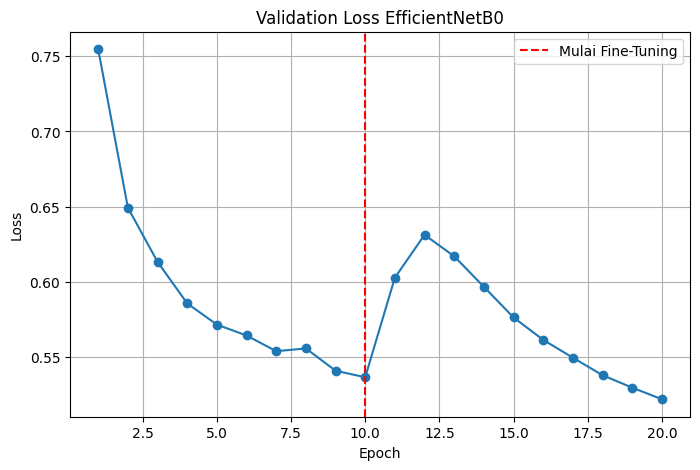

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_all["epoch"], history_all["val_loss"], marker="o")
plt.axvline(
    x=df_stage_1["epoch"].max(),
    linestyle="--",
    color="red",
    label="Mulai Fine-Tuning"
)

plt.title("Validation Loss EfficientNetB0")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 502ms/step


<Figure size 600x600 with 0 Axes>

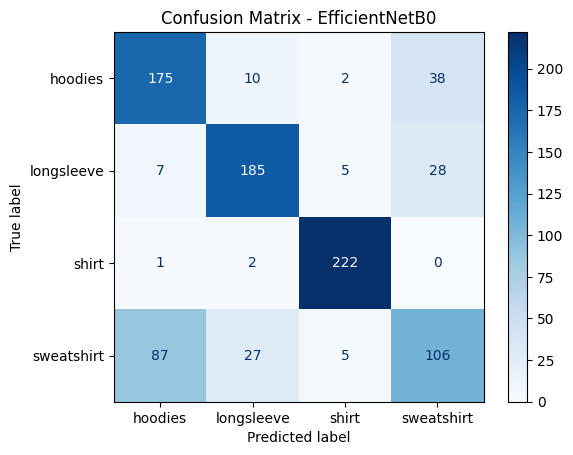

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
# Prediksi pada test set
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred)

class_names = list(test_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

plt.figure(figsize=(6,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names
)

print("Classification Report EfficientNetB0:\n")
print(report)


Classification Report EfficientNetB0:

              precision    recall  f1-score   support

     hoodies       0.65      0.78      0.71       225
  longsleeve       0.83      0.82      0.82       225
       shirt       0.95      0.99      0.97       225
  sweatshirt       0.62      0.47      0.53       225

    accuracy                           0.76       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.76      0.76      0.76       900



8. MENYIMPAN MODEL PRETRAINED 1 (MobileNetV2)

In [ ]:
import os
import json
import pandas as pd

# =========================================================
# KONFIGURASI PATH
# =========================================================
BASE_SAVE_DIR = "/content/drive/MyDrive/UAP/saved_models"
MODEL_NAME = "efficientnetb0_pretrained"

model_dir = os.path.join(BASE_SAVE_DIR, MODEL_NAME)
os.makedirs(model_dir, exist_ok=True)

# =========================================================
# 1️⃣ SIMPAN MODEL EfficientNetB0
# =========================================================
model_path = os.path.join(model_dir, "model.h5")
model.save(model_path)

print(f"[OK] Model EfficientNetB0 disimpan di: {model_path}")

# =========================================================
# 2️⃣ SIMPAN CLASS MAPPING
# =========================================================
class_mapping = train_generator.class_indices
mapping_path = os.path.join(model_dir, "class_mapping.json")

with open(mapping_path, "w") as f:
    json.dump(class_mapping, f, indent=4)

print("[OK] Class mapping disimpan:")
print(class_mapping)

# =========================================================
# 3️⃣ SIMPAN KONFIGURASI PREPROCESSING
# (WAJIB untuk konsistensi dashboard)
# =========================================================
config = {
    "img_height": 224,
    "img_width": 224,
    "preprocessing_function": "efficientnet.preprocess_input",
    "num_classes": train_generator.num_classes,
    "model_type": "efficientnetb0_pretrained",
    "base_model": "EfficientNetB0",
    "weights": "imagenet",
    "fine_tuning": True,
    "fine_tune_at": fine_tune_at,
    "optimizer_stage_1": "Adam(lr=1e-4)",
    "optimizer_stage_2": "Adam(lr=1e-5)"
}

config_path = os.path.join(model_dir, "config.json")

with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

print("[OK] Config preprocessing disimpan.")

# =========================================================
# 4️⃣ SIMPAN HISTORY TRAINING (GABUNG STAGE 1 & STAGE 2)
# =========================================================
history_stage_1_df = pd.DataFrame(history_stage_1.history)
history_stage_1_df["stage"] = "freeze_base"

history_stage_2_df = pd.DataFrame(history_stage_2.history)
history_stage_2_df["stage"] = "fine_tuning"

history_df = pd.concat(
    [history_stage_1_df, history_stage_2_df],
    ignore_index=True
)

history_path = os.path.join(model_dir, "training_history.csv")
history_df.to_csv(history_path, index=False)

print("[OK] History training (stage 1 + stage 2) disimpan.")

# =========================================================
# 5️⃣ VERIFIKASI FILE
# =========================================================
print("\nIsi folder model EfficientNetB0:")
for file in os.listdir(model_dir):
    print("-", file)


[OK] Model EfficientNetB0 disimpan di: /content/drive/MyDrive/UAP/saved_models/efficientnetb0_pretrained/model.h5
[OK] Class mapping disimpan:
{'hoodies': 0, 'longsleeve': 1, 'shirt': 2, 'sweatshirt': 3}
[OK] Config preprocessing disimpan.
[OK] History training (stage 1 + stage 2) disimpan.

Isi folder model EfficientNetB0:
- model.h5
- class_mapping.json
- config.json
- training_history.csv
